In [1]:
#basic library
import pandas as pd
import numpy as np
from scipy import stats

#visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 300

#Library preprocesing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#library pemodelan
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
xls = pd.ExcelFile('Daily Update Data Agregat Covid-19 Jakarta.xlsx')
data = pd.read_excel(xls, 'TA Vaksin')
data.set_index("Tanggal", inplace=True)
data

,Target_Tenaga_Kesehatan,Dosis1_TK,Dosis2_TK,PD1_TK,PD2_TK,Total_TK,Persentase_TK,Target_Lansia,Dosis1_Lansia,Dosis2_Lansia,...,PD2_L,Total_Lansia,Persentase_Lansia,Target_Pelayan_Publik,Dosis1_PP,Dosis2_PP,PD1_PP,PD2_PP,Total_PP,Persentase_PP
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-03-09,112301,113326,89984,1.009127,0.801275,203310,1.810402,911631,135128,675,...,0.000740,135803,0.148967,1976757,174685,29195,0.088369,0.014769,203880,0.103139
2021-03-10,112301,116791,90681,1.039982,0.807482,207472,1.847464,911631,154251,1100,...,0.001207,155351,0.170410,1976757,202452,17773,0.102416,0.008991,220225,0.111407
2021-03-11,112301,116823,90693,1.040267,0.807589,207516,1.847855,911631,154915,1103,...,0.001210,156018,0.171142,1976757,211754,17903,0.107122,0.009057,229657,0.116179
2021-03-12,112301,118086,91521,1.051513,0.814962,209607,1.866475,911631,167086,1291,...,0.001416,168377,0.184699,1976757,234403,20226,0.118580,0.010232,254629,0.128811
2021-03-13,112301,118283,91748,1.053268,0.816983,210031,1.870250,911631,174327,1444,...,0.001584,175771,0.192809,1976757,245355,21272,0.124120,0.010761,266627,0.134881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802201,734595,...,0.740175,1536796,1.548470,1976757,11599237,9841215,5.867811,4.978465,21440452,10.846276
2022-07-24,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802250,734636,...,0.740216,1536886,1.548561,1976757,11600236,9842283,5.868317,4.979005,21442519,10.847322
2022-07-25,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802257,734646,...,0.740227,1536903,1.548578,1976757,11600713,9842698,5.868558,4.979215,21443411,10.847773


In [3]:
data = data.interpolate(method='linear')
data

,Target_Tenaga_Kesehatan,Dosis1_TK,Dosis2_TK,PD1_TK,PD2_TK,Total_TK,Persentase_TK,Target_Lansia,Dosis1_Lansia,Dosis2_Lansia,...,PD2_L,Total_Lansia,Persentase_Lansia,Target_Pelayan_Publik,Dosis1_PP,Dosis2_PP,PD1_PP,PD2_PP,Total_PP,Persentase_PP
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-03-09,112301,113326,89984,1.009127,0.801275,203310,1.810402,911631,135128,675,...,0.000740,135803,0.148967,1976757,174685,29195,0.088369,0.014769,203880,0.103139
2021-03-10,112301,116791,90681,1.039982,0.807482,207472,1.847464,911631,154251,1100,...,0.001207,155351,0.170410,1976757,202452,17773,0.102416,0.008991,220225,0.111407
2021-03-11,112301,116823,90693,1.040267,0.807589,207516,1.847855,911631,154915,1103,...,0.001210,156018,0.171142,1976757,211754,17903,0.107122,0.009057,229657,0.116179
2021-03-12,112301,118086,91521,1.051513,0.814962,209607,1.866475,911631,167086,1291,...,0.001416,168377,0.184699,1976757,234403,20226,0.118580,0.010232,254629,0.128811
2021-03-13,112301,118283,91748,1.053268,0.816983,210031,1.870250,911631,174327,1444,...,0.001584,175771,0.192809,1976757,245355,21272,0.124120,0.010761,266627,0.134881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802201,734595,...,0.740175,1536796,1.548470,1976757,11599237,9841215,5.867811,4.978465,21440452,10.846276
2022-07-24,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802250,734636,...,0.740216,1536886,1.548561,1976757,11600236,9842283,5.868317,4.979005,21442519,10.847322
2022-07-25,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802257,734646,...,0.740227,1536903,1.548578,1976757,11600713,9842698,5.868558,4.979215,21443411,10.847773


In [4]:
LPD1_TK = []

for PD1_TK in data['PD1_TK']:
    if PD1_TK < 0.8 :
        LPD1_TK.append('Tidak Tercapai')
    elif PD1_TK > 0.8:
        LPD1_TK.append('Tercapai')

In [5]:
LPD2_TK = []

for PD2_TK in data['PD2_TK']:
    if PD2_TK < 0.8 :
        LPD2_TK.append('Tidak Tercapai')
    elif PD2_TK > 0.8:
        LPD2_TK.append('Tercapai')

In [6]:
label_TK = []

for Persentase_TK in data['Persentase_TK']:
    if Persentase_TK < 0.8 :
        label_TK.append('Tidak Tercapai')
    elif Persentase_TK > 0.8:
        label_TK.append('Tercapai')

In [7]:
LPD1_L = []

for PD1_L in data['PD1_L']:
    if PD1_L < 0.8 :
        LPD1_L.append('Tidak Tercapai')
    elif PD1_L > 0.8:
        LPD1_L.append('Tercapai')

In [8]:
LPD2_L = []

for PD2_L in data['PD2_L']:
    if PD2_L < 0.8 :
        LPD2_L.append('Tidak Tercapai')
    elif PD2_L > 0.8:
        LPD2_L.append('Tercapai')

In [9]:
label_lansia = []

for Persentase_Lansia in data['Persentase_Lansia']:
    if Persentase_Lansia < 0.8 :
        label_lansia.append('Tidak Tercapai')
    elif Persentase_Lansia > 0.8:
        label_lansia.append('Tercapai')

In [10]:
LPD1_PP = []

for PD1_PP in data['PD1_PP']:
    if PD1_PP < 0.8 :
        LPD1_PP.append('Tidak Tercapai')
    elif PD1_PP > 0.8:
        LPD1_PP.append('Tercapai')

In [11]:
LPD2_PP = []

for PD2_PP in data['PD2_PP']:
    if PD2_PP < 0.8 :
        LPD2_PP.append('Tidak Tercapai')
    elif PD2_PP > 0.8:
        LPD2_PP.append('Tercapai')

In [12]:
label_PP = []

for Persentase_PP in data['Persentase_PP']:
    if Persentase_PP < 0.8 :
        label_PP.append('Tidak Tercapai')
    elif Persentase_PP > 0.8:
        label_PP.append('Tercapai')

In [13]:
data['LPD1_TK'] = LPD1_TK
data['LPD2_TK'] = LPD2_TK
data['Label_TK'] = label_TK
data['LPD1_L'] = LPD1_L
data['LPD2_L'] = LPD2_L
data['Label_Lansia'] = label_lansia
data['LPD1_PP'] = LPD1_PP
data['LPD2_PP'] = LPD2_PP
data['Label_PP'] = label_PP
data

,Target_Tenaga_Kesehatan,Dosis1_TK,Dosis2_TK,PD1_TK,PD2_TK,Total_TK,Persentase_TK,Target_Lansia,Dosis1_Lansia,Dosis2_Lansia,...,Persentase_PP,LPD1_TK,LPD2_TK,Label_TK,LPD1_L,LPD2_L,Label_Lansia,LPD1_PP,LPD2_PP,Label_PP
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-03-09,112301,113326,89984,1.009127,0.801275,203310,1.810402,911631,135128,675,...,0.103139,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai
2021-03-10,112301,116791,90681,1.039982,0.807482,207472,1.847464,911631,154251,1100,...,0.111407,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai
2021-03-11,112301,116823,90693,1.040267,0.807589,207516,1.847855,911631,154915,1103,...,0.116179,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai
2021-03-12,112301,118086,91521,1.051513,0.814962,209607,1.866475,911631,167086,1291,...,0.128811,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai
2021-03-13,112301,118283,91748,1.053268,0.816983,210031,1.870250,911631,174327,1444,...,0.134881,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai,Tidak Tercapai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802201,734595,...,10.846276,Tercapai,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tercapai,Tercapai,Tercapai,Tercapai
2022-07-24,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802250,734636,...,10.847322,Tercapai,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tercapai,Tercapai,Tercapai,Tercapai
2022-07-25,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802257,734646,...,10.847773,Tercapai,Tercapai,Tercapai,Tercapai,Tidak Tercapai,Tercapai,Tercapai,Tercapai,Tercapai


In [14]:
#data.to_excel("Daily Vaksinasi.xlsx")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2021-03-09 to 2022-07-27
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Target_Tenaga_Kesehatan  506 non-null    int64  
 1   Dosis1_TK                506 non-null    int64  
 2   Dosis2_TK                506 non-null    int64  
 3   PD1_TK                   506 non-null    float64
 4   PD2_TK                   506 non-null    float64
 5   Total_TK                 506 non-null    int64  
 6   Persentase_TK            506 non-null    float64
 7   Target_Lansia            506 non-null    int64  
 8   Dosis1_Lansia            506 non-null    int64  
 9   Dosis2_Lansia            506 non-null    int64  
 10  PD1_L                    506 non-null    float64
 11  PD2_L                    506 non-null    float64
 12  Total_Lansia             506 non-null    int64  
 13  Persentase_Lansia        506 non-null    float64
 14  Target_

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtypes == object:
        data[col]= le.fit_transform(data[col])

In [18]:
data

,Target_Tenaga_Kesehatan,Dosis1_TK,Dosis2_TK,PD1_TK,PD2_TK,Total_TK,Persentase_TK,Target_Lansia,Dosis1_Lansia,Dosis2_Lansia,...,Persentase_PP,LPD1_TK,LPD2_TK,Label_TK,LPD1_L,LPD2_L,Label_Lansia,LPD1_PP,LPD2_PP,Label_PP
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-03-09,112301,113326,89984,1.009127,0.801275,203310,1.810402,911631,135128,675,...,0.103139,0,0,0,1,1,1,1,1,1
2021-03-10,112301,116791,90681,1.039982,0.807482,207472,1.847464,911631,154251,1100,...,0.111407,0,0,0,1,1,1,1,1,1
2021-03-11,112301,116823,90693,1.040267,0.807589,207516,1.847855,911631,154915,1103,...,0.116179,0,0,0,1,1,1,1,1,1
2021-03-12,112301,118086,91521,1.051513,0.814962,209607,1.866475,911631,167086,1291,...,0.128811,0,0,0,1,1,1,1,1,1
2021-03-13,112301,118283,91748,1.053268,0.816983,210031,1.870250,911631,174327,1444,...,0.134881,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802201,734595,...,10.846276,0,0,0,0,1,0,0,0,0
2022-07-24,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802250,734636,...,10.847322,0,0,0,0,1,0,0,0,0
2022-07-25,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802257,734646,...,10.847773,0,0,0,0,1,0,0,0,0


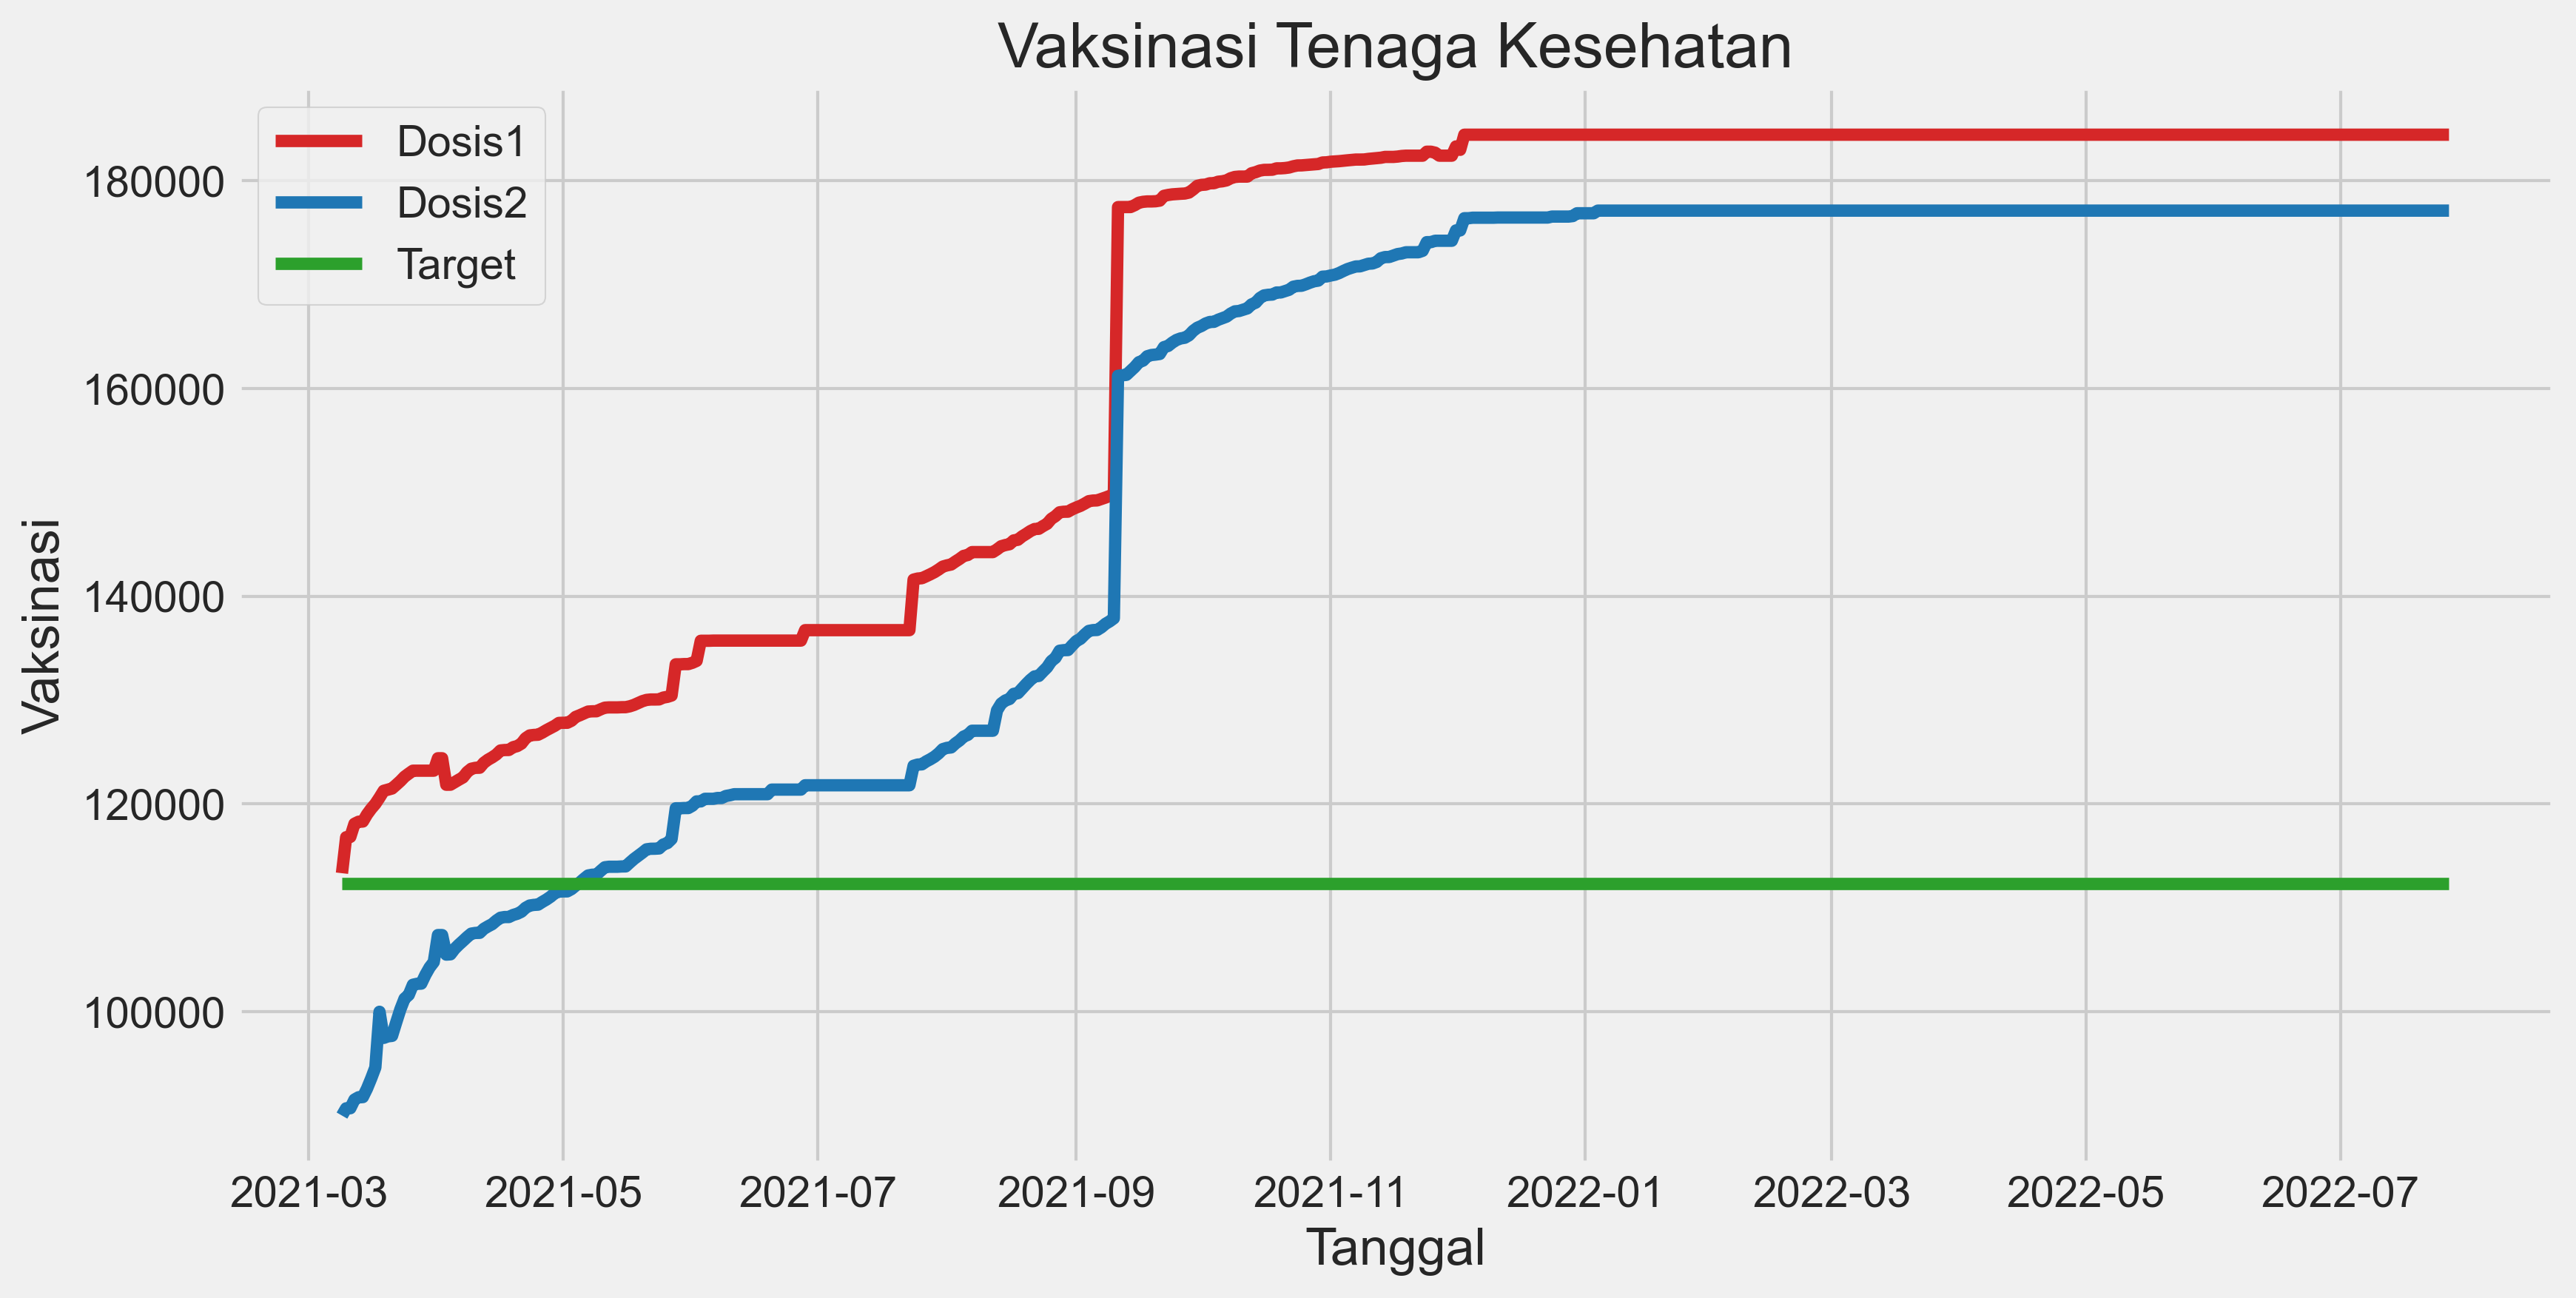

In [19]:
plt.figure(figsize=(12,6))
plt.title('Vaksinasi Tenaga Kesehatan')
plt.xlabel('Tanggal')
plt.ylabel('Vaksinasi')
sns.lineplot(data=data, x="Tanggal", y="Dosis1_TK", color='tab:red')
sns.lineplot(data=data, x="Tanggal", y="Dosis2_TK", color='tab:blue')
sns.lineplot(data=data, x="Tanggal", y="Target_Tenaga_Kesehatan", color='tab:green')
plt.legend(labels=['Dosis1', 'Dosis2','Target'])

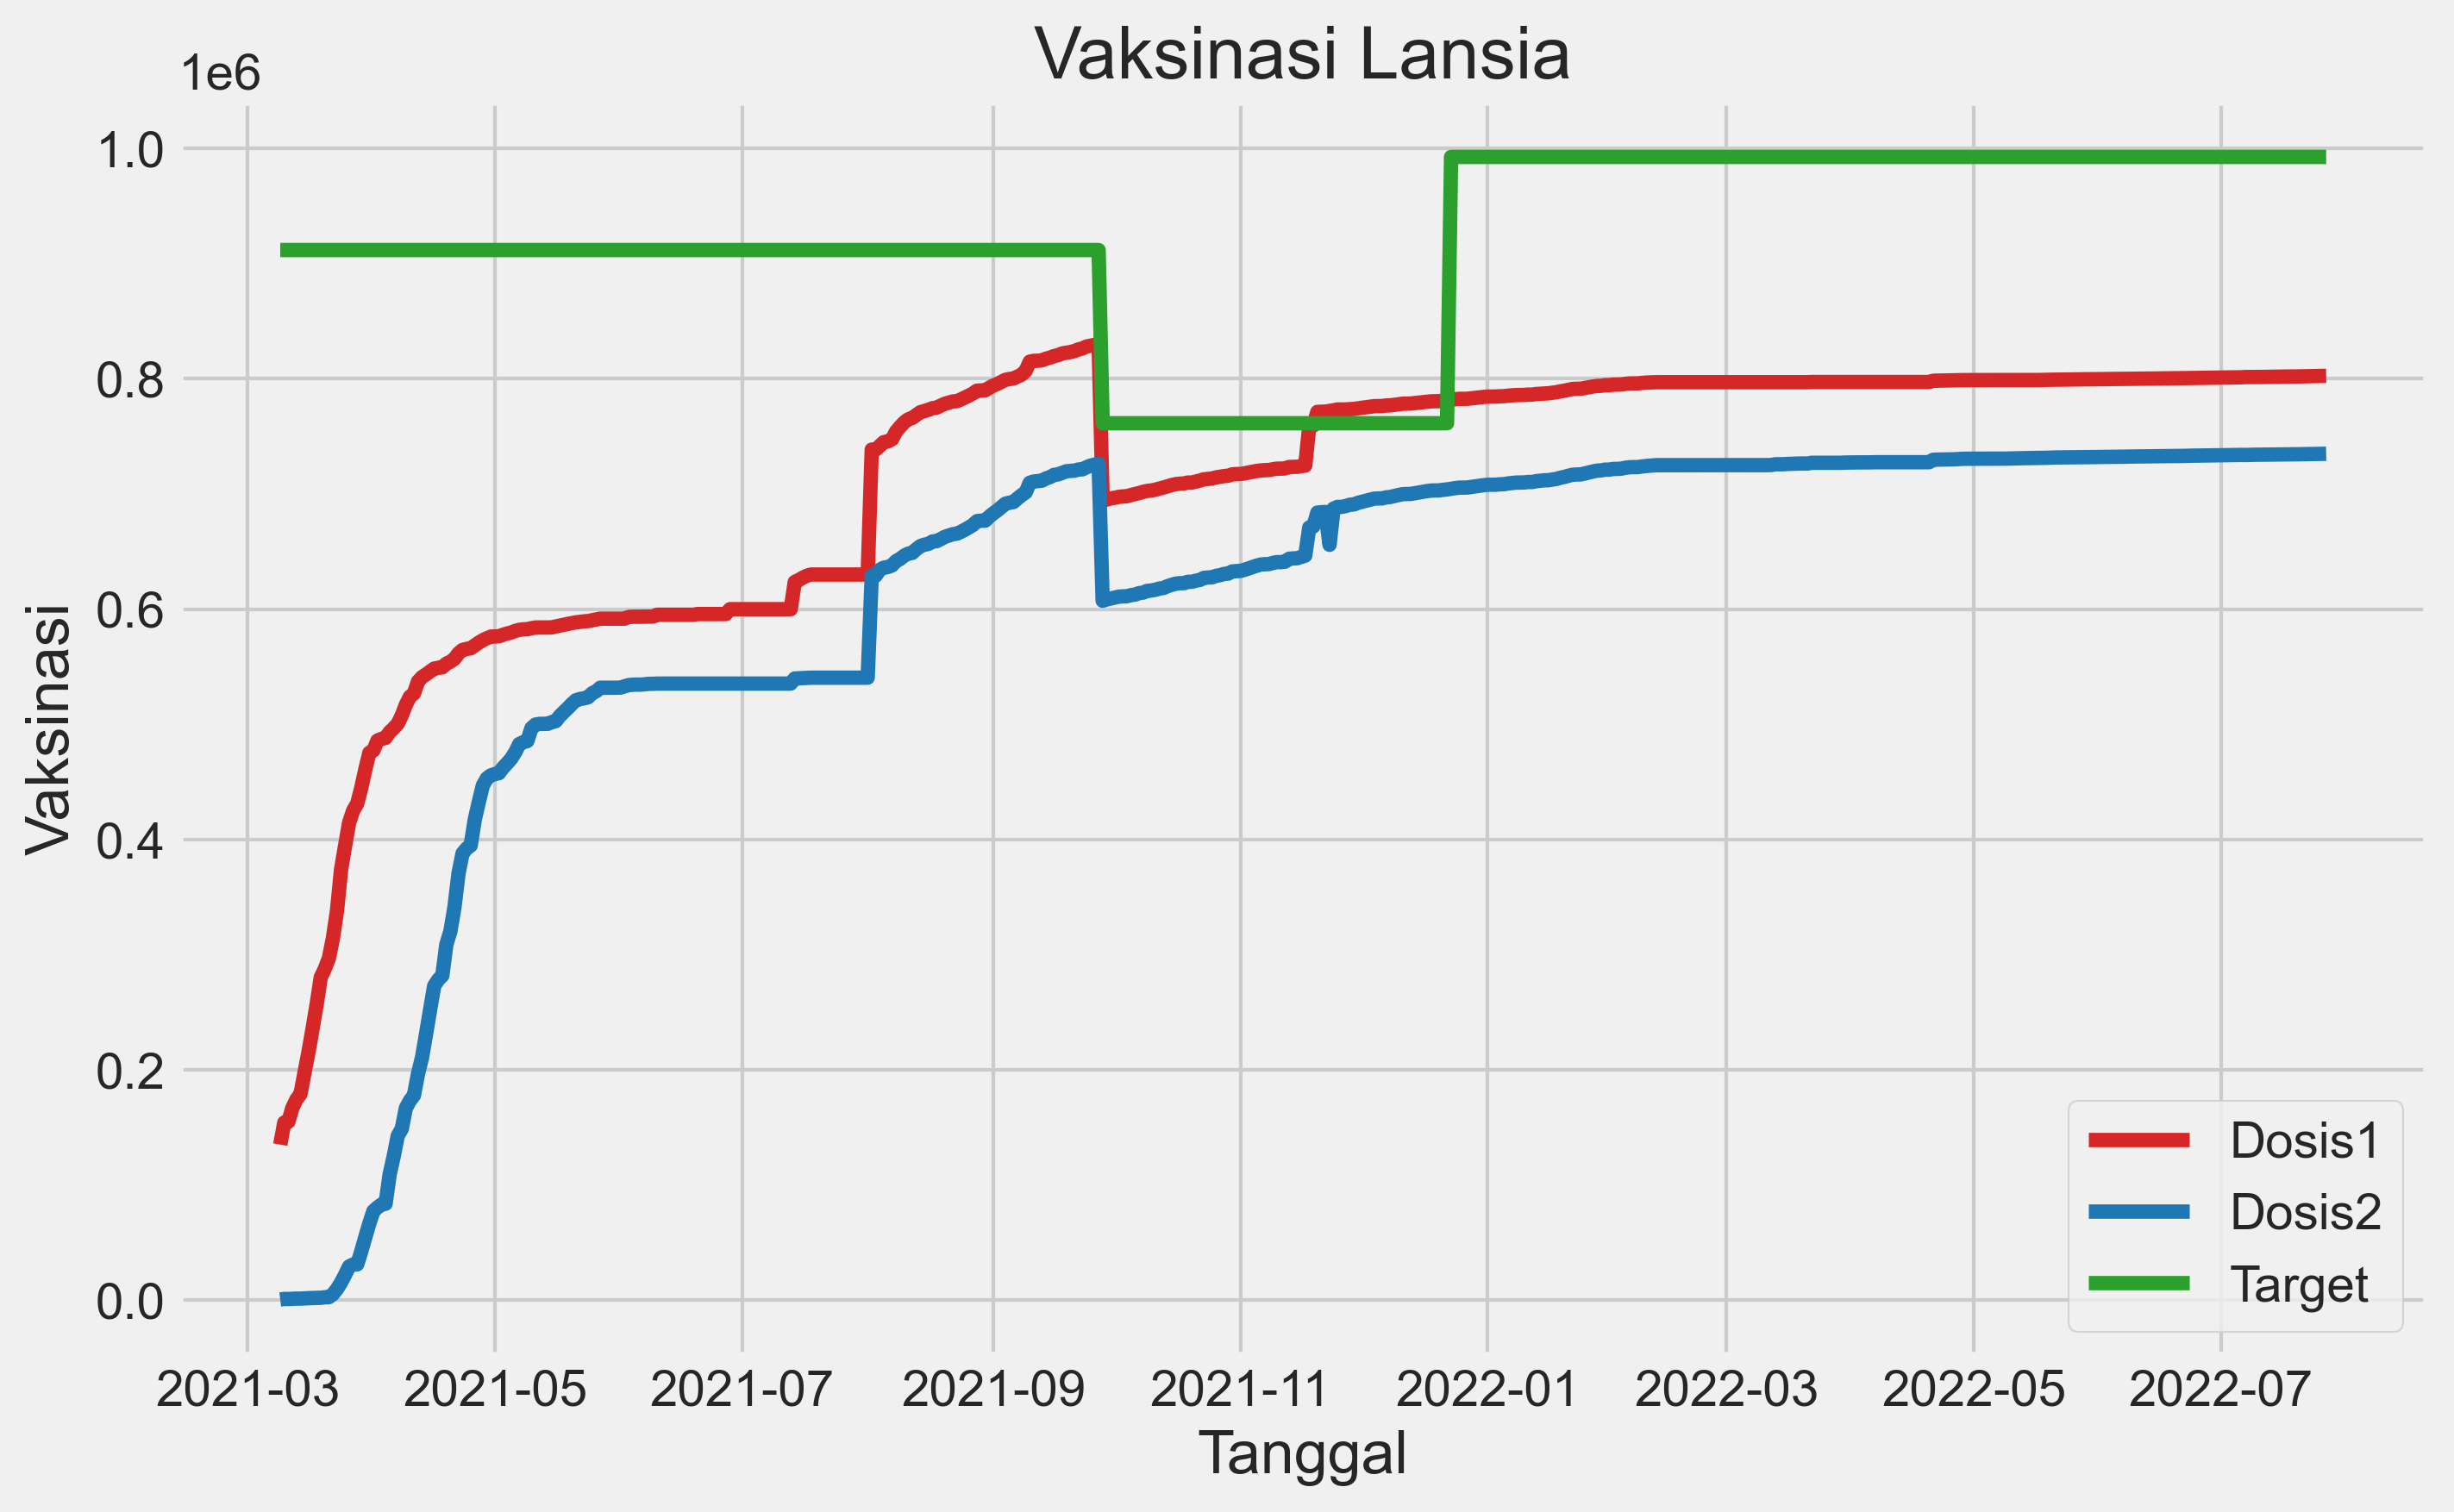

In [20]:
plt.figure(figsize=(10,6))
plt.title('Vaksinasi Lansia')
plt.xlabel('Tanggal')
plt.ylabel('Vaksinasi')
sns.lineplot(data=data, x="Tanggal", y="Dosis1_Lansia", color='tab:red')
sns.lineplot(data=data, x="Tanggal", y="Dosis2_Lansia", color='tab:blue')
sns.lineplot(data=data, x="Tanggal", y="Target_Lansia", color='tab:green')
plt.legend(labels=['Dosis1', 'Dosis2','Target'])

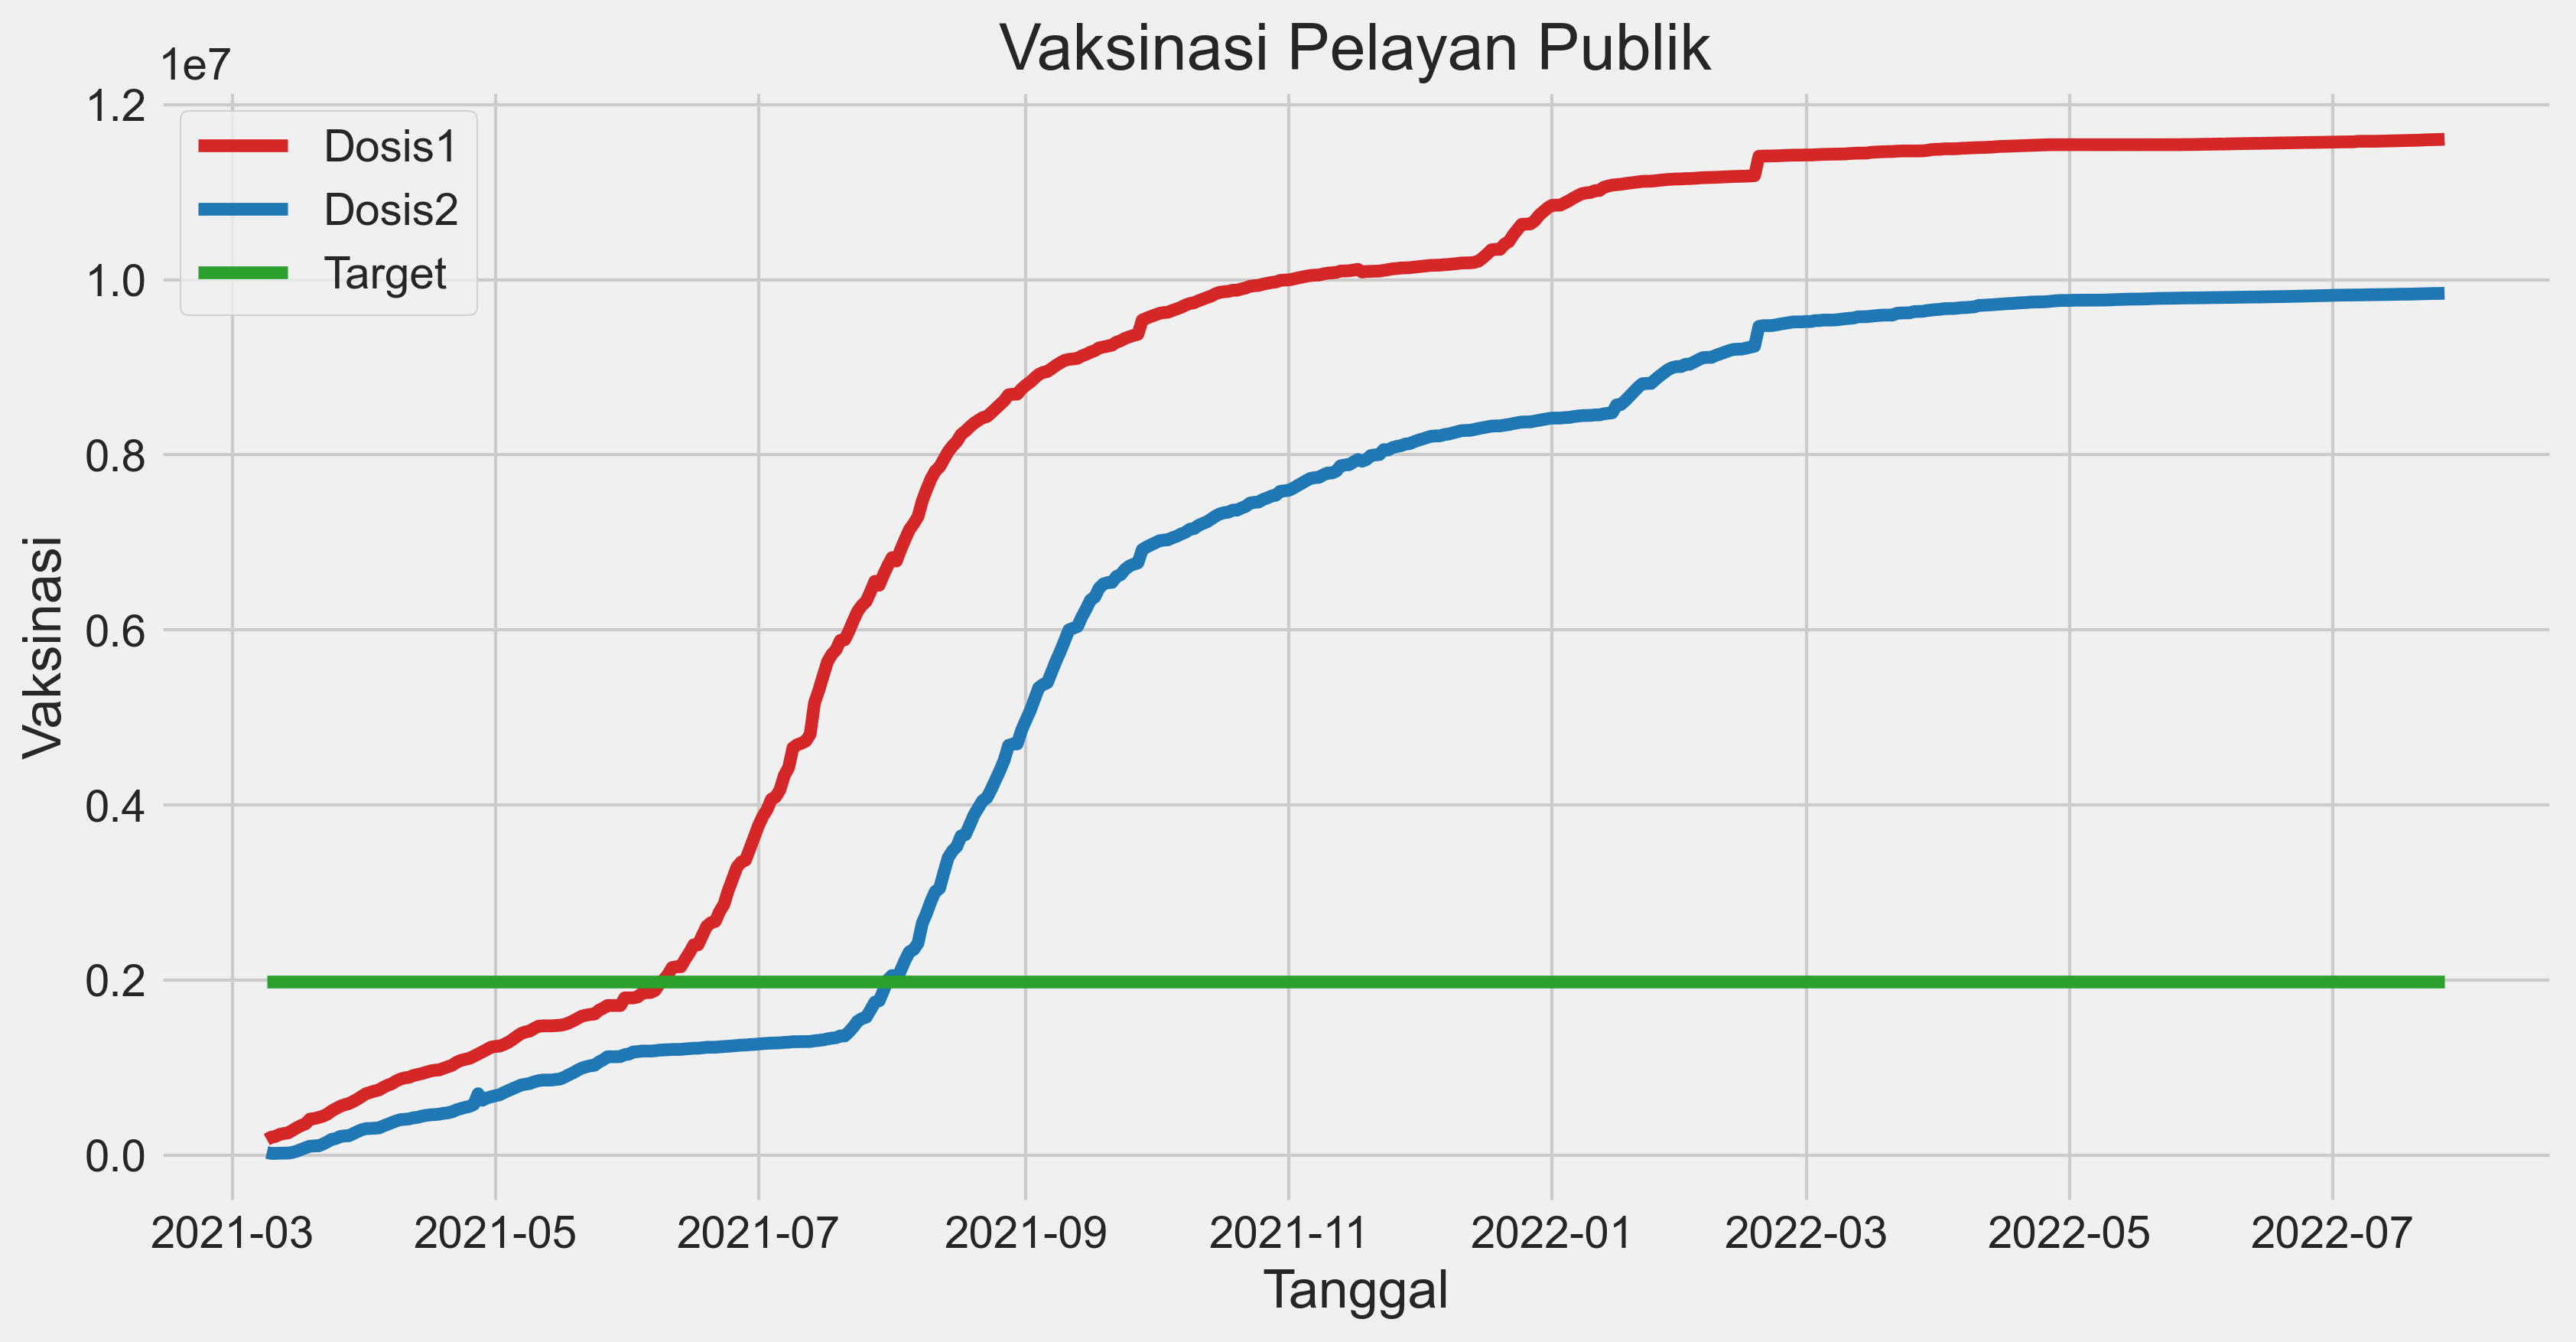

In [21]:
plt.figure(figsize=(12,6))
plt.title('Vaksinasi Pelayan Publik')
plt.xlabel('Tanggal')
plt.ylabel('Vaksinasi')
sns.lineplot(data=data, x="Tanggal", y="Dosis1_PP", color='tab:red')
sns.lineplot(data=data, x="Tanggal", y="Dosis2_PP", color='tab:blue')
sns.lineplot(data=data, x="Tanggal", y="Target_Pelayan_Publik", color='tab:green')
plt.legend(labels=['Dosis1', 'Dosis2','Target'])

In [22]:
to_drop=data[['LPD1_TK','LPD2_TK','LPD1_L','LPD2_L','LPD1_PP','LPD2_PP','Target_Tenaga_Kesehatan','Target_Lansia','Target_Pelayan_Publik','Total_TK','Total_Lansia','Total_PP','Label_TK','Label_Lansia','Label_PP']]
x=data.drop(to_drop,axis=1)
#y=data[['Label_TK','Label_Lansia','Label_PP']]
y=data[['LPD1_TK','LPD2_TK','LPD1_L','LPD2_L','LPD1_PP','LPD2_PP']]

In [23]:
x

,Dosis1_TK,Dosis2_TK,PD1_TK,PD2_TK,Persentase_TK,Dosis1_Lansia,Dosis2_Lansia,PD1_L,PD2_L,Persentase_Lansia,Dosis1_PP,Dosis2_PP,PD1_PP,PD2_PP,Persentase_PP
Tanggal,,,,,,,,,,,,,,,
2021-03-09,113326,89984,1.009127,0.801275,1.810402,135128,675,0.148227,0.000740,0.148967,174685,29195,0.088369,0.014769,0.103139
2021-03-10,116791,90681,1.039982,0.807482,1.847464,154251,1100,0.169203,0.001207,0.170410,202452,17773,0.102416,0.008991,0.111407
2021-03-11,116823,90693,1.040267,0.807589,1.847855,154915,1103,0.169932,0.001210,0.171142,211754,17903,0.107122,0.009057,0.116179
2021-03-12,118086,91521,1.051513,0.814962,1.866475,167086,1291,0.183282,0.001416,0.184699,234403,20226,0.118580,0.010232,0.128811
2021-03-13,118283,91748,1.053268,0.816983,1.870250,174327,1444,0.191225,0.001584,0.192809,245355,21272,0.124120,0.010761,0.134881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,184450,177138,1.642461,1.577350,3.219811,802201,734595,0.808295,0.740175,1.548470,11599237,9841215,5.867811,4.978465,10.846276
2022-07-24,184450,177138,1.642461,1.577350,3.219811,802250,734636,0.808344,0.740216,1.548561,11600236,9842283,5.868317,4.979005,10.847322
2022-07-25,184450,177138,1.642461,1.577350,3.219811,802257,734646,0.808351,0.740227,1.548578,11600713,9842698,5.868558,4.979215,10.847773


In [24]:
y

,LPD1_TK,LPD2_TK,LPD1_L,LPD2_L,LPD1_PP,LPD2_PP
Tanggal,,,,,,
2021-03-09,0,0,1,1,1,1
2021-03-10,0,0,1,1,1,1
2021-03-11,0,0,1,1,1,1
2021-03-12,0,0,1,1,1,1
2021-03-13,0,0,1,1,1,1
...,...,...,...,...,...,...
2022-07-23,0,0,0,1,0,0
2022-07-24,0,0,0,1,0,0
2022-07-25,0,0,0,1,0,0


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [26]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_features=5, random_state=4)

In [27]:
y_pred_rf = rf.predict(xtest)
y_pred_rf

array([[0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1],
 

In [28]:
#pd.DataFrame({'actual_value':ytest,'predicted_value':y_pred_rf})

In [29]:
target_names = ['LPD1_TK','LPD2_TK','LPD1_L','LPD2_L','LPD1_PP','LPD2_PP']
print(classification_report(ytest, y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

     LPD1_TK       0.00      0.00      0.00         0
     LPD2_TK       0.00      0.00      0.00         0
      LPD1_L       1.00      1.00      1.00        40
      LPD2_L       0.99      1.00      0.99        81
     LPD1_PP       1.00      0.94      0.97        16
     LPD2_PP       1.00      1.00      1.00        31

   micro avg       0.99      0.99      0.99       168
   macro avg       0.66      0.66      0.66       168
weighted avg       0.99      0.99      0.99       168
 samples avg       0.79      0.79      0.79       168



In [30]:
X=data.drop(to_drop,axis=1)
Y=data[['Label_TK','Label_Lansia','Label_PP']]
#y=data[['LPD1_TK','LPD2_TK','LPD1_L','LPD2_L','LPD1_PP','LPD2_PP']]

In [31]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=4)

In [32]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(Xtrain,Ytrain)

RandomForestClassifier(max_features=5, random_state=4)

In [33]:
Y_pred_rf = rf.predict(Xtest)
Y_pred_rf

array([[0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [34]:
target_names = ['Label_TK','Label_Lansia','Label_PP']
print(classification_report(Ytest, Y_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

    Label_TK       0.00      0.00      0.00         0
Label_Lansia       1.00      1.00      1.00         6
    Label_PP       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        12
   macro avg       0.67      0.67      0.67        12
weighted avg       1.00      1.00      1.00        12
 samples avg       0.06      0.06      0.06        12



# Perkategori

In [35]:
data

,Target_Tenaga_Kesehatan,Dosis1_TK,Dosis2_TK,PD1_TK,PD2_TK,Total_TK,Persentase_TK,Target_Lansia,Dosis1_Lansia,Dosis2_Lansia,...,Persentase_PP,LPD1_TK,LPD2_TK,Label_TK,LPD1_L,LPD2_L,Label_Lansia,LPD1_PP,LPD2_PP,Label_PP
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-03-09,112301,113326,89984,1.009127,0.801275,203310,1.810402,911631,135128,675,...,0.103139,0,0,0,1,1,1,1,1,1
2021-03-10,112301,116791,90681,1.039982,0.807482,207472,1.847464,911631,154251,1100,...,0.111407,0,0,0,1,1,1,1,1,1
2021-03-11,112301,116823,90693,1.040267,0.807589,207516,1.847855,911631,154915,1103,...,0.116179,0,0,0,1,1,1,1,1,1
2021-03-12,112301,118086,91521,1.051513,0.814962,209607,1.866475,911631,167086,1291,...,0.128811,0,0,0,1,1,1,1,1,1
2021-03-13,112301,118283,91748,1.053268,0.816983,210031,1.870250,911631,174327,1444,...,0.134881,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-23,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802201,734595,...,10.846276,0,0,0,0,1,0,0,0,0
2022-07-24,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802250,734636,...,10.847322,0,0,0,0,1,0,0,0,0
2022-07-25,112301,184450,177138,1.642461,1.577350,361588,3.219811,992461,802257,734646,...,10.847773,0,0,0,0,1,0,0,0,0


## Dosis 1 dan 2

### Tenaga Kesehatan

In [36]:
x1 = data[['Dosis1_TK', 'PD1_TK','Dosis2_TK','PD2_TK']]
Y1= data [['LPD2_TK','LPD2_TK']]

In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, Y1, test_size=0.2, random_state=4)

In [38]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(X_train1,y_train1)

RandomForestClassifier(max_features=5, random_state=4)

In [39]:
Y_pred_rf1 = rf.predict(X_test1)
Y_pred_rf1

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [40]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(y_test1, Y_pred_rf1, average='micro')))
print('Precision: {}'.format(metrics.precision_score(y_test1, Y_pred_rf1, average='micro')))
print('F1-Score: {}'.format(metrics.f1_score(y_test1, Y_pred_rf1, average='micro')))

Recall: 0.0
Precision: 0.0
F1-Score: 0.0


In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#CM1 = confusion_matrix(y_test1,Y_pred_rf1)
label = ['LPD1_TK','LPD2_TK']
print(classification_report(y_test1,Y_pred_rf1,target_names=label))

              precision    recall  f1-score   support

     LPD1_TK       0.00      0.00      0.00         0
     LPD2_TK       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0



In [42]:
#sns.heatmap(CM1,annot=True)

### Lansia

In [43]:
x2 = data[['Dosis1_Lansia', 'PD1_L','Dosis2_Lansia','PD2_L']]
Y2= data [['LPD2_L','LPD2_L']]

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, Y2, test_size=0.2, random_state=4)

In [45]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(X_train2,y_train2)

RandomForestClassifier(max_features=5, random_state=4)

In [46]:
Y_pred_rf2 = rf.predict(X_test2)
Y_pred_rf2

array([[1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1,

In [47]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(y_test2, Y_pred_rf2,average='micro')))
print('Precision: {}'.format(metrics.precision_score(y_test2, Y_pred_rf2,average='micro')))
print('F1-Score: {}'.format(metrics.f1_score(y_test2, Y_pred_rf2,average='micro')))

Recall: 1.0
Precision: 0.9878048780487805
F1-Score: 0.9938650306748467


In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#CM2 = confusion_matrix(y_test2, Y_pred_rf2)
label = ['LPD2_L','LPD2_L']
print(classification_report(y_test2, Y_pred_rf2,target_names=label))

              precision    recall  f1-score   support

      LPD2_L       0.99      1.00      0.99        81
      LPD2_L       0.99      1.00      0.99        81

   micro avg       0.99      1.00      0.99       162
   macro avg       0.99      1.00      0.99       162
weighted avg       0.99      1.00      0.99       162
 samples avg       0.79      0.79      0.79       162



In [49]:
#sns.heatmap(CM2,annot=True)

### Pelayan Publik

In [50]:
x3 = data[['Dosis1_PP', 'PD1_PP','Dosis2_PP','PD2_PP']]
Y3= data [['LPD1_PP','LPD2_PP']]

In [51]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, Y3, test_size=0.2, random_state=4)

In [52]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(X_train3,y_train3)

RandomForestClassifier(max_features=5, random_state=4)

In [53]:
Y_pred_rf3 = rf.predict(X_test3)
Y_pred_rf3

array([[1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [54]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(y_test3, Y_pred_rf3,average='micro')))
print('Precision: {}'.format(metrics.precision_score(y_test3, Y_pred_rf3,average='micro')))
print('F1-Score: {}'.format(metrics.f1_score(y_test3, Y_pred_rf3,average='micro')))

Recall: 0.9787234042553191
Precision: 1.0
F1-Score: 0.989247311827957


In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#CM3 = confusion_matrix(y_test3, Y_pred_rf3)
label = ['LPD1_PP','LPD2_PP']
print(classification_report(y_test3, Y_pred_rf3,target_names=label))

              precision    recall  f1-score   support

     LPD1_PP       1.00      0.94      0.97        16
     LPD2_PP       1.00      1.00      1.00        31

   micro avg       1.00      0.98      0.99        47
   macro avg       1.00      0.97      0.98        47
weighted avg       1.00      0.98      0.99        47
 samples avg       0.30      0.30      0.30        47



In [56]:
#sns.heatmap(CM3,annot=True)

## Tenaga Kesehatan

### Dosis 1

In [57]:
X1 = data[['Dosis1_TK', 'PD1_TK']]
X1

,Dosis1_TK,PD1_TK
Tanggal,,
2021-03-09,113326,1.009127
2021-03-10,116791,1.039982
2021-03-11,116823,1.040267
2021-03-12,118086,1.051513
2021-03-13,118283,1.053268
...,...,...
2022-07-23,184450,1.642461
2022-07-24,184450,1.642461
2022-07-25,184450,1.642461


In [58]:
y1=data[['LPD1_TK']]
y1

,LPD1_TK
Tanggal,
2021-03-09,0
2021-03-10,0
2021-03-11,0
2021-03-12,0
2021-03-13,0
...,...
2022-07-23,0
2022-07-24,0
2022-07-25,0


In [59]:
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1, y1, test_size=0.2, random_state=4)

In [60]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(Xtrain1,ytrain1)

RandomForestClassifier(max_features=5, random_state=4)

In [61]:
print('akurasi model : {}'.format(rf.score(Xtest1,ytest1)*100))

akurasi model : 100.0


In [62]:
y_pred_rf1 = rf.predict(Xtest1)
y_pred_rf1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
#pd.DataFrame({'actual_value':ytest1,'predicted_value':y_pred_rf1})

In [64]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(ytest1, y_pred_rf1)))
print('Precision: {}'.format(metrics.precision_score(ytest1, y_pred_rf1)))
print('F1-Score: {}'.format(metrics.f1_score(ytest1, y_pred_rf1)))

Recall: 0.0
Precision: 0.0
F1-Score: 0.0


In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm1 = confusion_matrix(ytest1,y_pred_rf1)
print(classification_report(ytest1,y_pred_rf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



<AxesSubplot:>

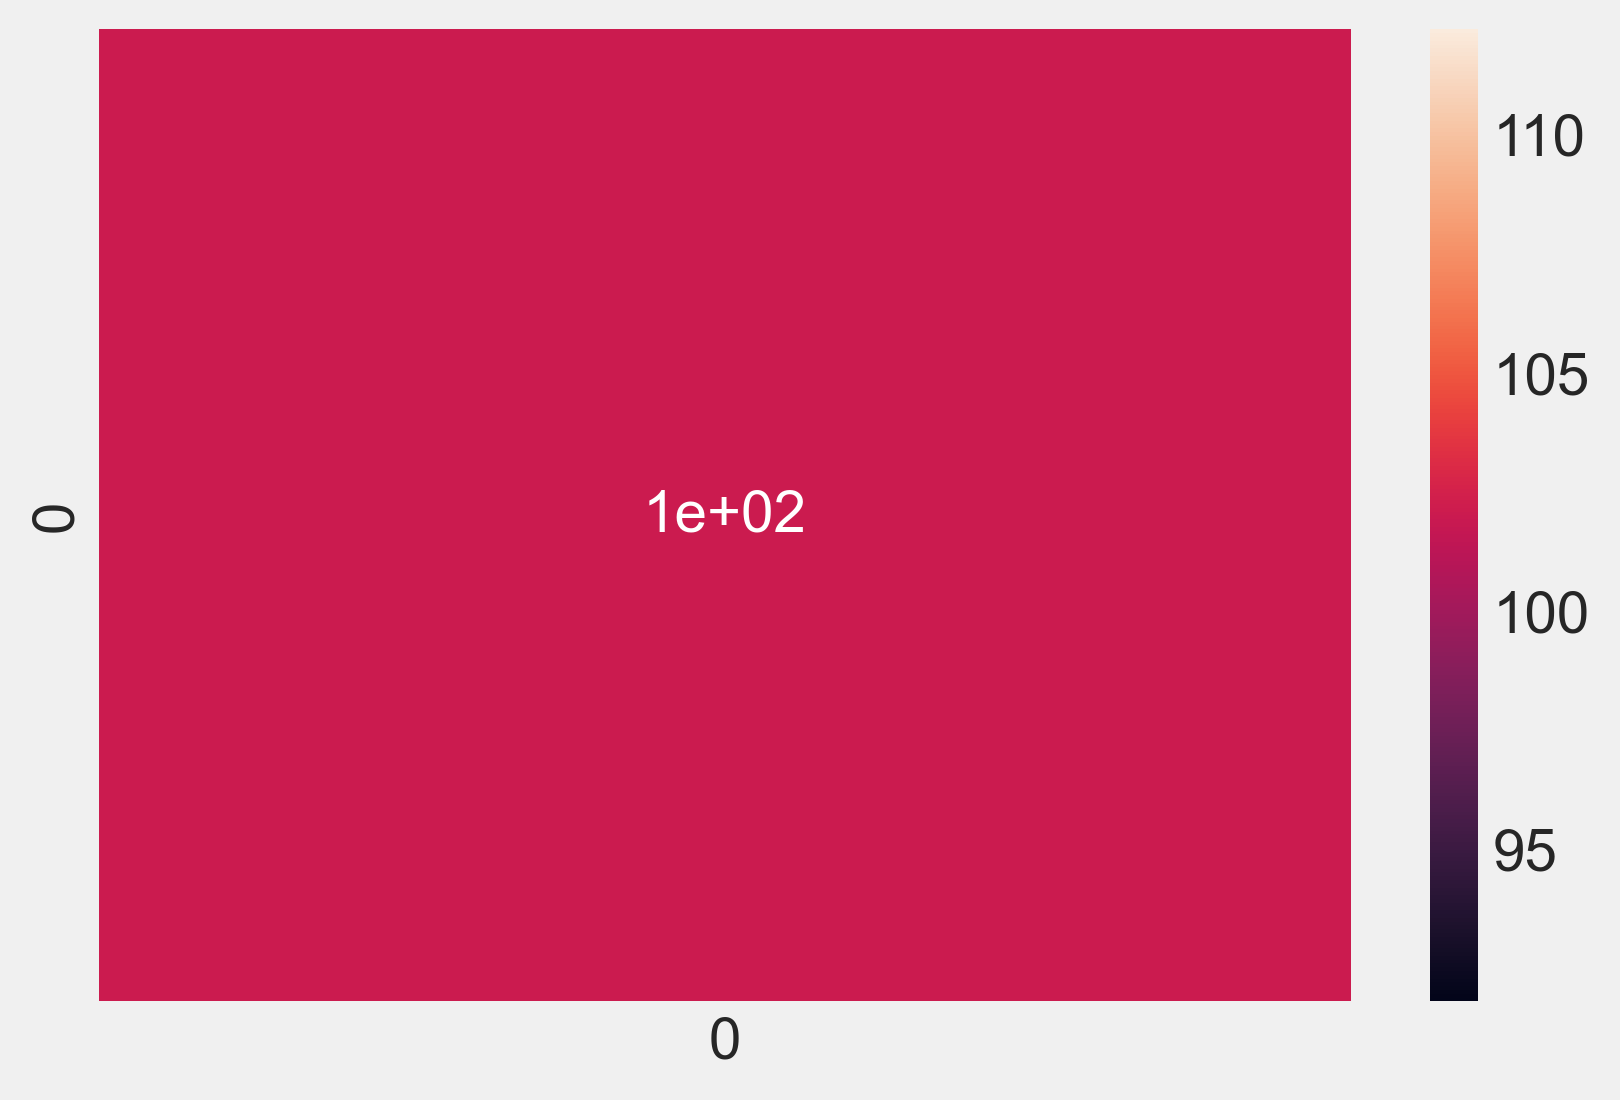

In [66]:
sns.heatmap(cm1,annot=True)

### Dosis 2

In [67]:
X2 = data[['Dosis2_TK','PD2_TK']]
y2= data [['LPD2_TK']]

In [68]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size=0.2, random_state=4)

In [69]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(Xtrain2,ytrain2)

RandomForestClassifier(max_features=5, random_state=4)

In [70]:
print('akurasi model : {}'.format(rf.score(Xtest2,ytest2)*100))

akurasi model : 100.0


In [71]:
y_pred_rf2 = rf.predict(Xtest2)
y_pred_rf2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(ytest2, y_pred_rf2)))
print('Precision: {}'.format(metrics.precision_score(ytest2, y_pred_rf2)))
print('F1-Score: {}'.format(metrics.f1_score(ytest2, y_pred_rf2)))

Recall: 0.0
Precision: 0.0
F1-Score: 0.0


In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm2 = confusion_matrix(ytest2,y_pred_rf2)
print(classification_report(ytest2,y_pred_rf2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



<AxesSubplot:>

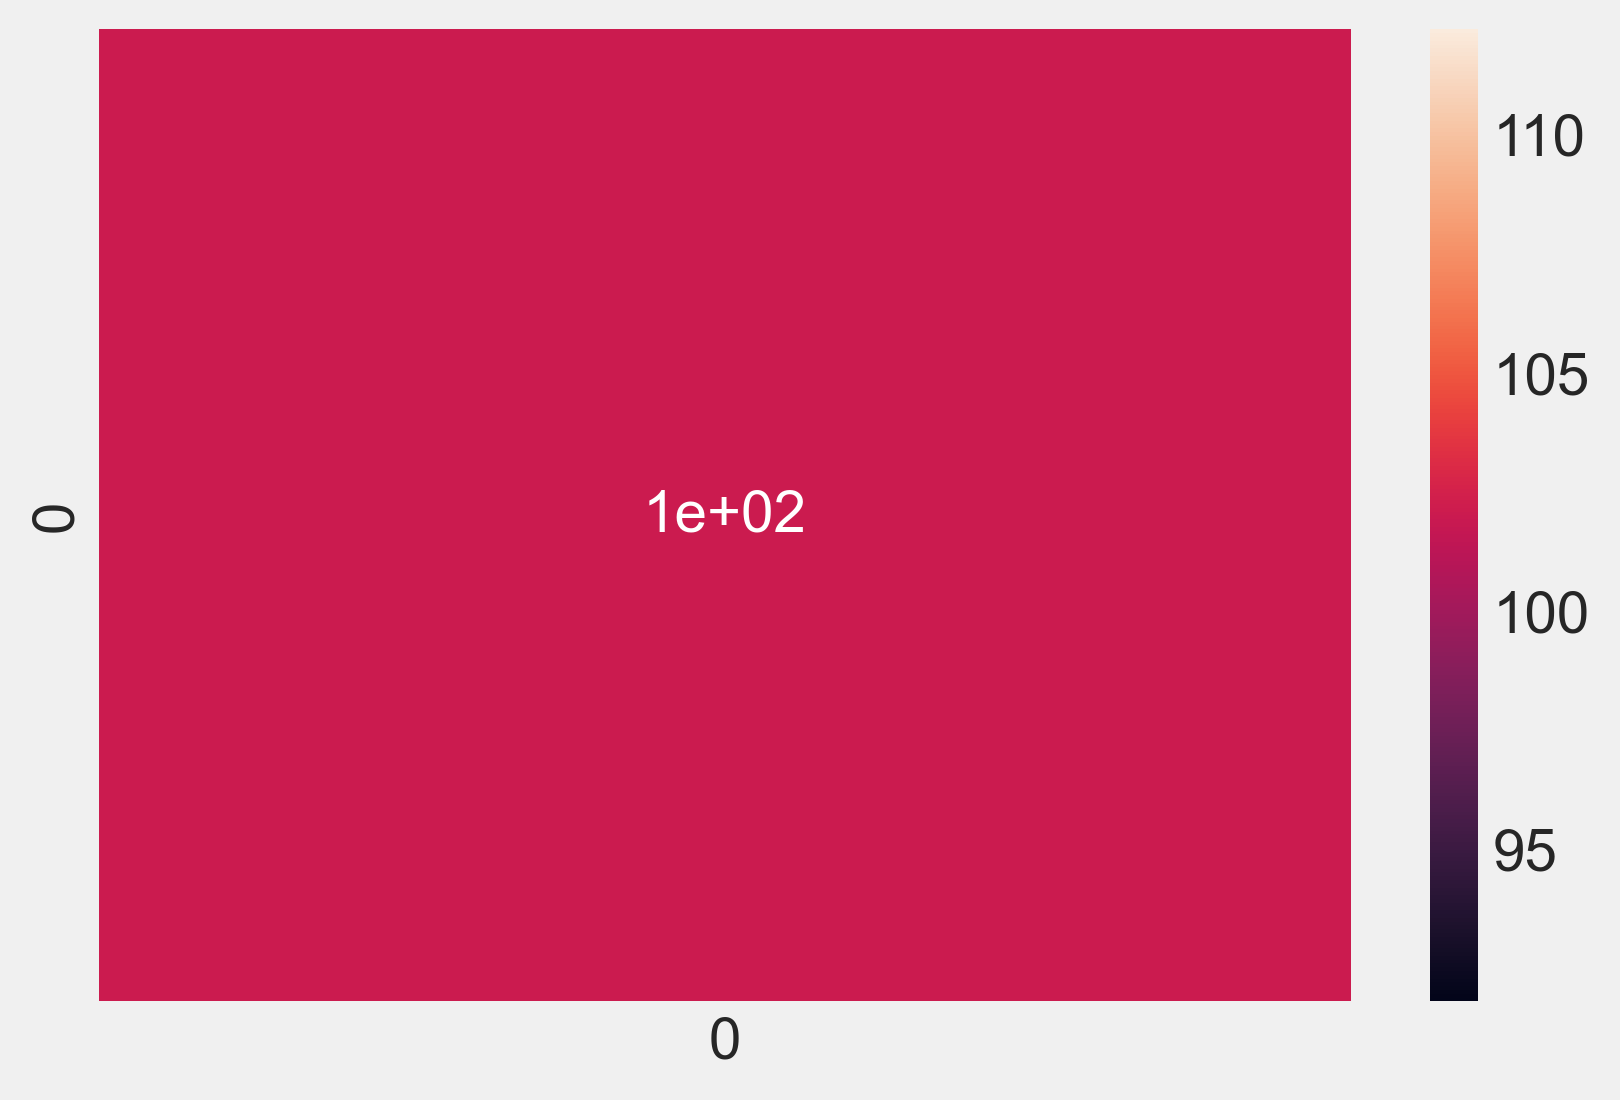

In [74]:
sns.heatmap(cm2,annot=True)

## Lansia

### Dosis 1

In [75]:
X3 = data[['Dosis1_Lansia','PD1_L']]
X3

,Dosis1_Lansia,PD1_L
Tanggal,,
2021-03-09,135128,0.148227
2021-03-10,154251,0.169203
2021-03-11,154915,0.169932
2021-03-12,167086,0.183282
2021-03-13,174327,0.191225
...,...,...
2022-07-23,802201,0.808295
2022-07-24,802250,0.808344
2022-07-25,802257,0.808351


In [76]:
y3=data[['LPD1_L']]
y3

,LPD1_L
Tanggal,
2021-03-09,1
2021-03-10,1
2021-03-11,1
2021-03-12,1
2021-03-13,1
...,...
2022-07-23,0
2022-07-24,0
2022-07-25,0


In [77]:
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, test_size=0.2, random_state=4)

In [78]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(Xtrain3,ytrain3)

RandomForestClassifier(max_features=5, random_state=4)

In [79]:
print('akurasi model : {}'.format(rf.score(Xtest3,ytest3)*100))

akurasi model : 100.0


In [80]:
y_pred_rf3 = rf.predict(Xtest3)
y_pred_rf3

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [81]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(ytest3, y_pred_rf3)))
print('Precision: {}'.format(metrics.precision_score(ytest3, y_pred_rf3)))
print('F1-Score: {}'.format(metrics.f1_score(ytest3, y_pred_rf3)))

Recall: 1.0
Precision: 1.0
F1-Score: 1.0


In [82]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm3 = confusion_matrix(ytest3,y_pred_rf3)
print(classification_report(ytest3,y_pred_rf3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        40

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



<AxesSubplot:>

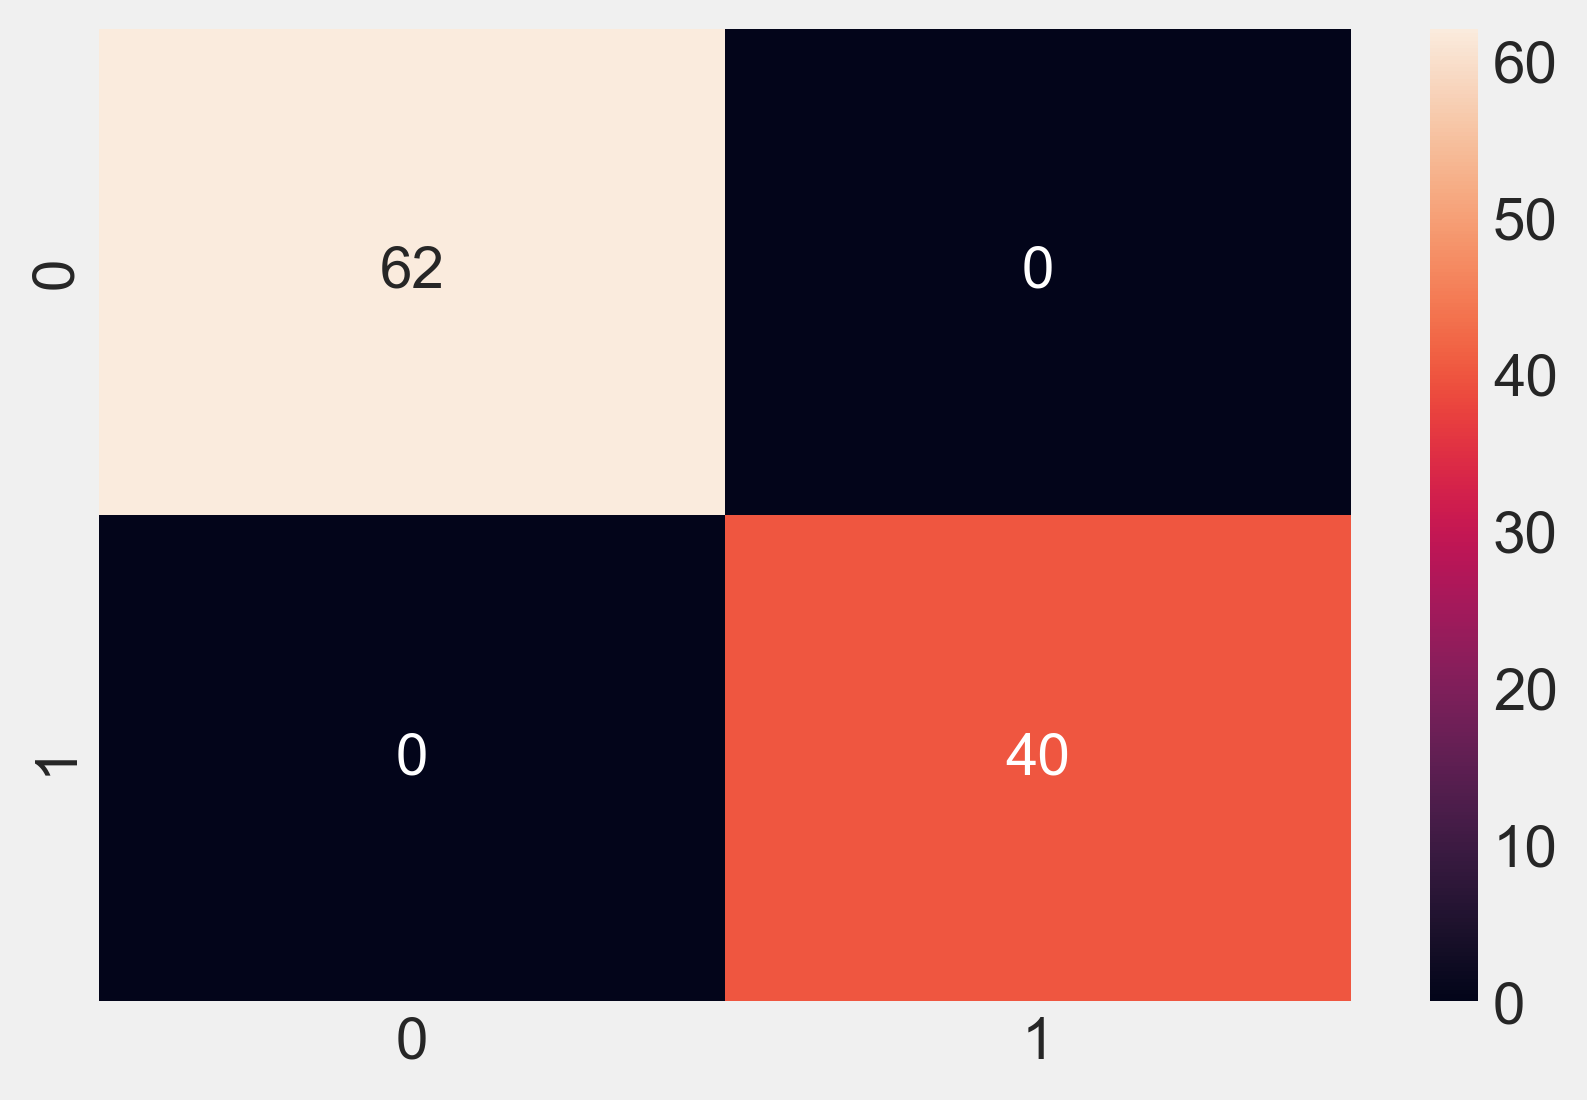

In [83]:
sns.heatmap(cm3,annot=True)

### Dosis 2

In [84]:
X4= data[[ 'Dosis2_Lansia','PD2_L']]
y4=data[['LPD2_L']]

In [85]:
Xtrain4, Xtest4, ytrain4, ytest4 = train_test_split(X4, y4, test_size=0.2, random_state=4)

In [86]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(Xtrain4,ytrain4)

RandomForestClassifier(max_features=5, random_state=4)

In [87]:
print('akurasi model : {}'.format(rf.score(Xtest4,ytest4)*100))

akurasi model : 99.01960784313727


In [88]:
y_pred_rf4 = rf.predict(Xtest4)
y_pred_rf4

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [89]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(ytest4, y_pred_rf4)))
print('Precision: {}'.format(metrics.precision_score(ytest4, y_pred_rf4)))
print('F1-Score: {}'.format(metrics.f1_score(ytest4, y_pred_rf4)))

Recall: 1.0
Precision: 0.9878048780487805
F1-Score: 0.9938650306748467


In [90]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm4 = confusion_matrix(ytest4,y_pred_rf4)
print(classification_report(ytest4,y_pred_rf4))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.99      1.00      0.99        81

    accuracy                           0.99       102
   macro avg       0.99      0.98      0.98       102
weighted avg       0.99      0.99      0.99       102



<AxesSubplot:>

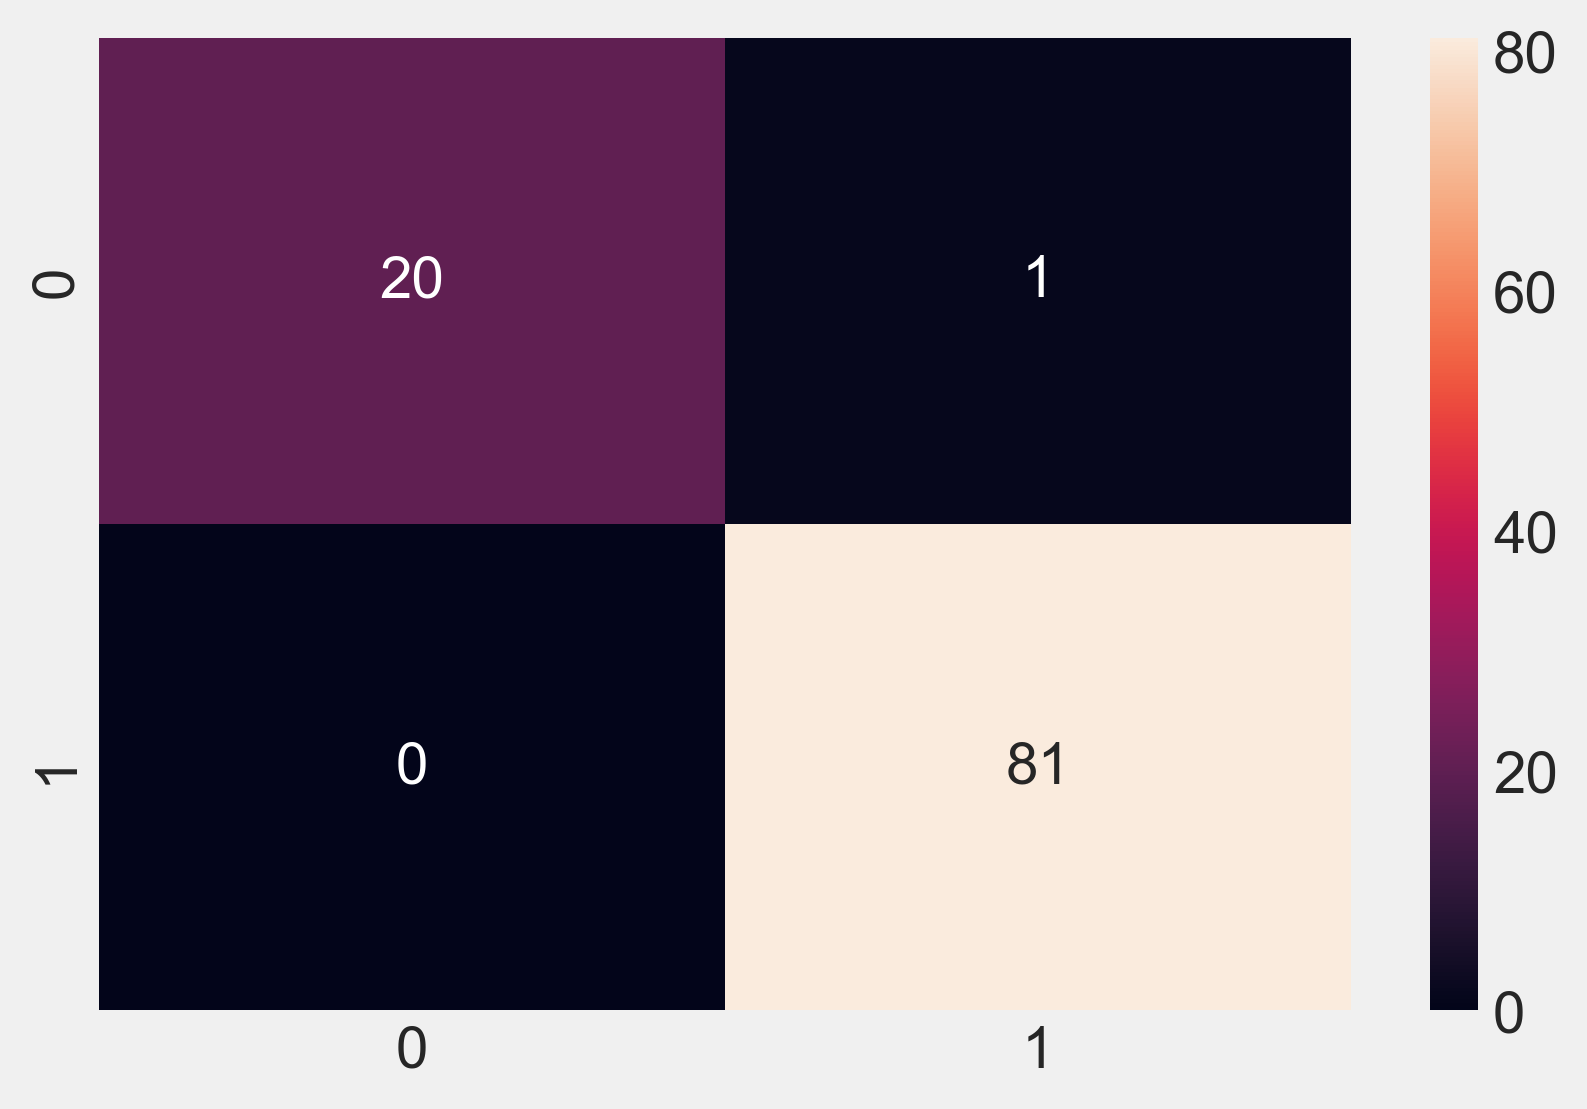

In [91]:
sns.heatmap(cm4,annot=True)

## Pelayan Publik

### Dosis 1

In [92]:
X5 = data[['Dosis1_PP', 'PD1_PP']]
X5

,Dosis1_PP,PD1_PP
Tanggal,,
2021-03-09,174685,0.088369
2021-03-10,202452,0.102416
2021-03-11,211754,0.107122
2021-03-12,234403,0.118580
2021-03-13,245355,0.124120
...,...,...
2022-07-23,11599237,5.867811
2022-07-24,11600236,5.868317
2022-07-25,11600713,5.868558


In [93]:
y5=data[['LPD1_PP']]
y5

,LPD1_PP
Tanggal,
2021-03-09,1
2021-03-10,1
2021-03-11,1
2021-03-12,1
2021-03-13,1
...,...
2022-07-23,0
2022-07-24,0
2022-07-25,0


In [94]:
Xtrain5, Xtest5, ytrain5, ytest5 = train_test_split(X5, y5, test_size=0.2, random_state=4)

In [95]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(Xtrain5,ytrain5)

RandomForestClassifier(max_features=5, random_state=4)

In [96]:
print('akurasi model : {}'.format(rf.score(Xtest5,ytest5)*100))

akurasi model : 100.0


In [97]:
y_pred_rf5 = rf.predict(Xtest5)
y_pred_rf5

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(ytest5, y_pred_rf5)))
print('Precision: {}'.format(metrics.precision_score(ytest5, y_pred_rf5)))
print('F1-Score: {}'.format(metrics.f1_score(ytest5, y_pred_rf5)))

Recall: 1.0
Precision: 1.0
F1-Score: 1.0


In [99]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm5 = confusion_matrix(ytest5,y_pred_rf5)
print(classification_report(ytest5,y_pred_rf5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        16

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



<AxesSubplot:>

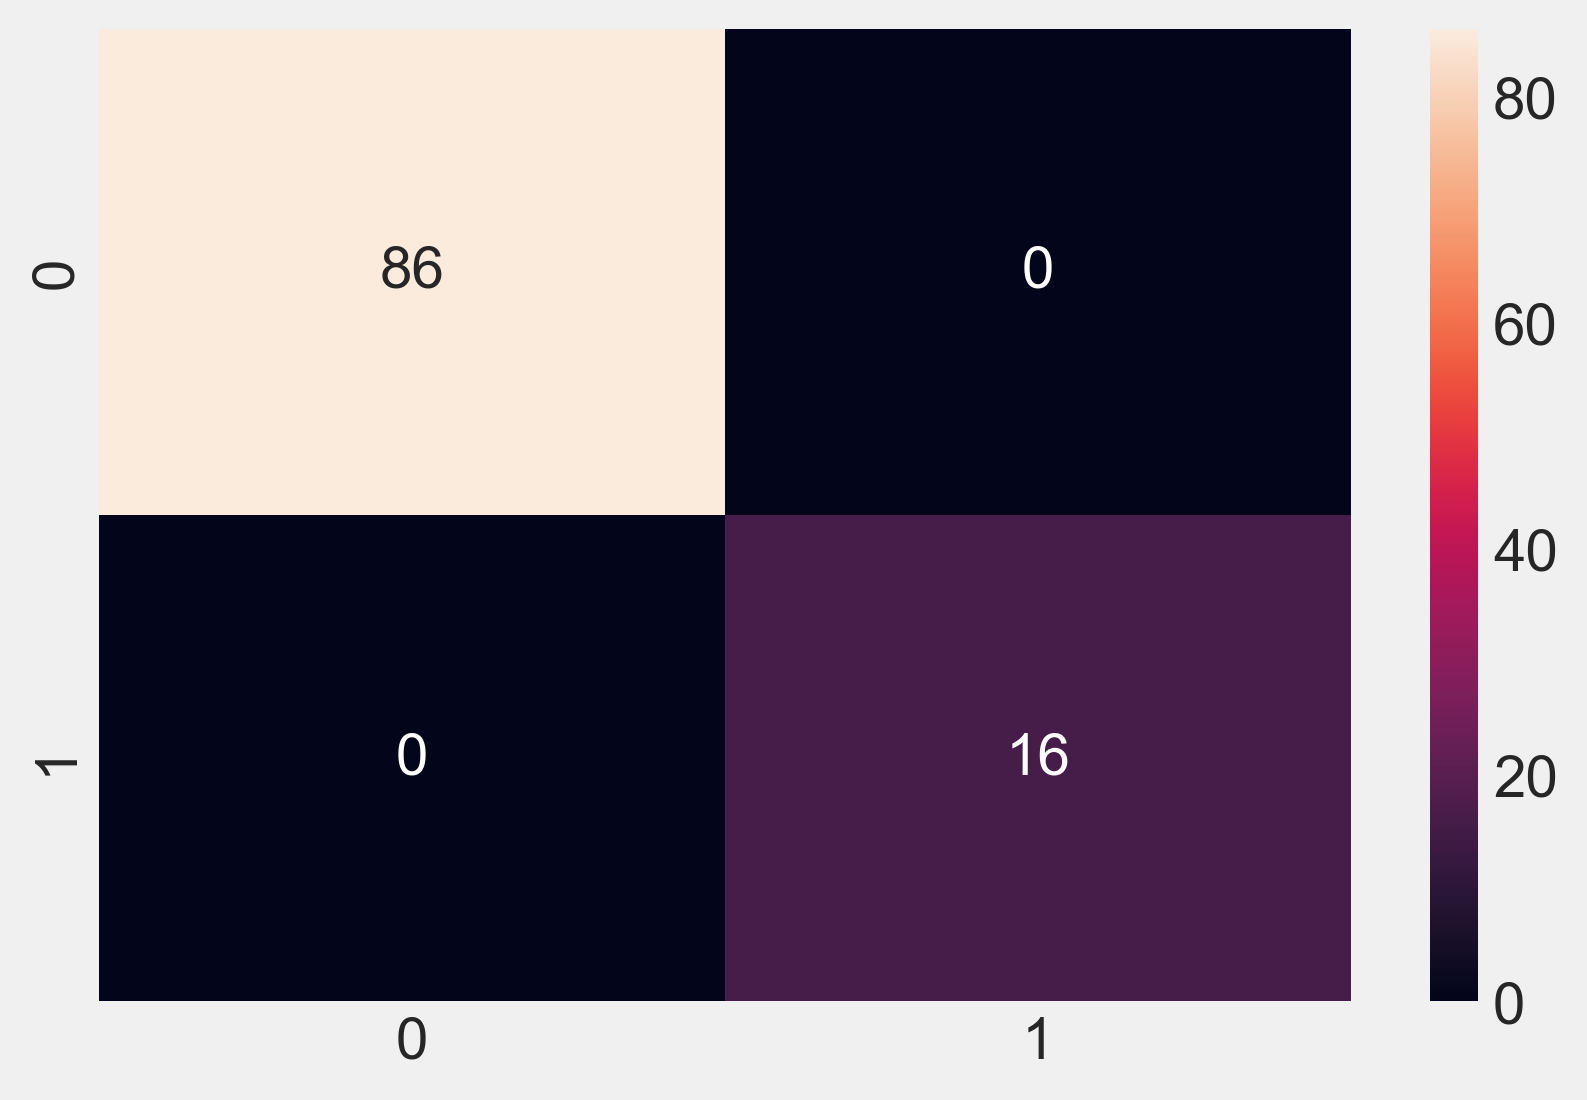

In [100]:
sns.heatmap(cm5,annot=True)

### Dosis 2

In [101]:
X6 = data[['Dosis2_PP','PD2_PP']]
y6=data[['LPD2_PP']]

In [102]:
Xtrain6, Xtest6, ytrain6, ytest6 = train_test_split(X6, y6, test_size=0.2, random_state=4)

In [103]:
rf = RandomForestClassifier(n_estimators=100,random_state=4,max_features=5)
rf.fit(Xtrain6,ytrain6)

RandomForestClassifier(max_features=5, random_state=4)

In [104]:
print('akurasi model : {}'.format(rf.score(Xtest6,ytest6)*100))

akurasi model : 100.0


In [105]:
y_pred_rf6 = rf.predict(Xtest6)
y_pred_rf6

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
from sklearn import metrics
print('Recall: {}'.format(metrics.recall_score(ytest6, y_pred_rf6)))
print('Precision: {}'.format(metrics.precision_score(ytest6, y_pred_rf6)))
print('F1-Score: {}'.format(metrics.f1_score(ytest6, y_pred_rf6)))

Recall: 1.0
Precision: 1.0
F1-Score: 1.0


In [107]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm6 = confusion_matrix(ytest6,y_pred_rf6)
print(classification_report(ytest6,y_pred_rf6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        31

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



<AxesSubplot:>

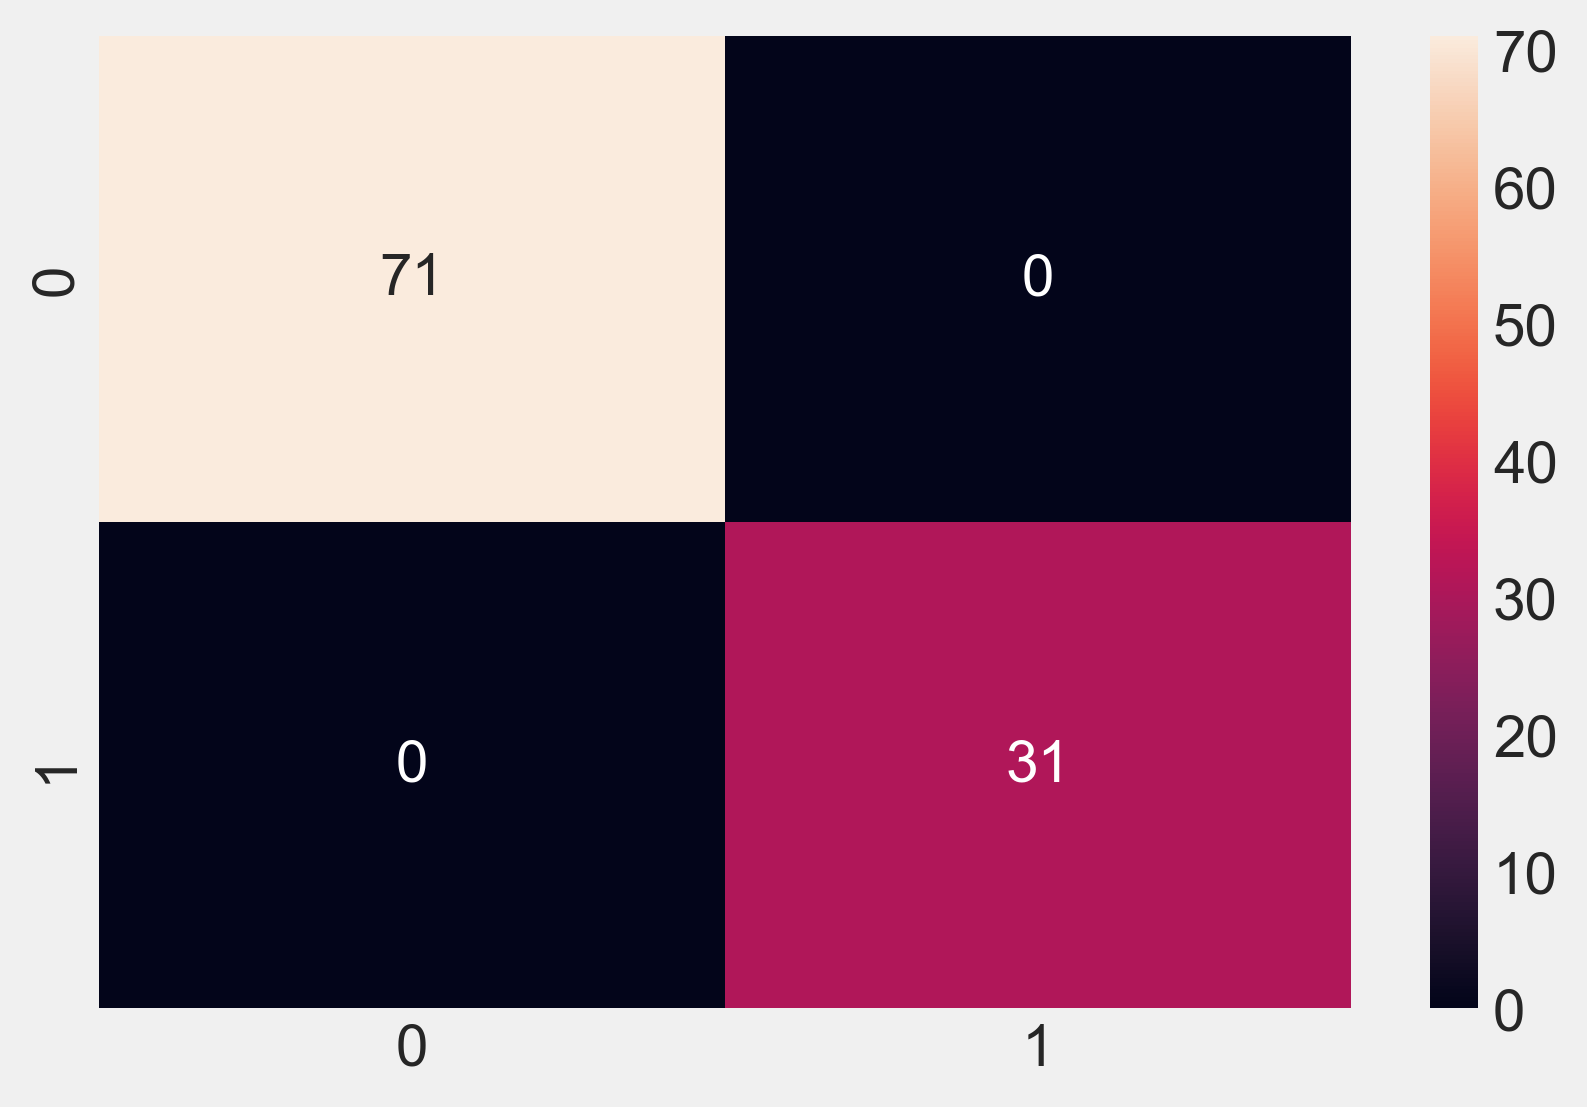

In [108]:
sns.heatmap(cm6,annot=True)